<center><h1> IFT-6758  Data Science  </h1></center>
<center><h2> Fall - 2020 </h2></center> 
<center><h3> Kaggle Competition</h3></center> 
<center><h3> </h3></center> 
<center><h3> Prediction Program</h3></center> 



# Read train data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import minmax_scale

In [ ]:
train_data = pd.read_pickle("train_cleaned.pkl")
test_data = pd.read_pickle("test_cleaned.pkl")
id_test = test_data['Id']
train_data

,Id,Personal URL,Profile Cover Image Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,Profile Creation Month,Profile Creation Day,Profile Creation WeekDay,Profile Creation Hour,User Language,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1.0,2.0,-39600.0,-36000.0,-28800.0,-25200.0,-21600.0,-18000.0,-14400.0,-10800.0,-7200.0,0.0,3600.0,7200.0,10800.0,14400.0,16200.0,18000.0,19800.0,21600.0,25200.0,28800.0,32400.0,36000.0,37800.0,39600.0,46800.0,Not verified,Pending,Verified,business,celebrity,government,unknown,Num of Profile Likes
2,JS49LP5P72RI1OQB,0.0,1.0,1fc2de,efefef,1fc2de,0,10,2,4.0,20,6,4.128561,3.273464,3.672005,2.357935,1.518514,0.301030,JS49LP5P72RI1OQB.png,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.193125
4,CRSEMK4QER6LDJSA,1.0,1.0,58424d,f7f7f7,000000,0,3,31,1.0,13,6,3.964542,1.973128,3.514813,2.117271,0.954243,0.698970,CRSEMK4QER6LDJSA.png,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.033021
5,0FEKBQ59AF1LQKJP,1.0,1.0,007cc2,ddeef6,3493d0,0,9,30,3.0,17,6,4.709160,2.372912,4.200905,2.671173,1.518514,0.301030,0FEKBQ59AF1LQKJP.png,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.230449
8,ORJN6I5G6NA6QD0Q,0.0,1.0,f5abb5,e0e0e0,e0cce0,0,5,25,0.0,23,6,4.281283,2.149219,3.427811,2.320146,1.322219,0.845098,ORJN6I5G6NA6QD0Q.png,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.093071
9,5JIAFD6132MNPAL9,0.0,1.0,1da1f2,ddeef6,c0deed,1,10,17,0.0,14,6,5.899709,2.869818,4.287174,2.380211,1.544068,0.602060,5JIAFD6132MNPAL9.png,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2.722634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,EQM27ASK6HGQHDTB,0.0,1.0,1da1f2,ddeef6,c0deed,1,2,24,3.0,21,8,3.386677,2.996512,3.800648,1.662758,1.462398,0.477121,EQM27ASK6HGQHDTB.png,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.820661
7492,3QIOBBC2TCMCMOM8,0.0,1.0,0084b4,ddeef6,c0deed,0,8,1,0.0,6,6,4.893079,2.484300,3.926805,2.459392,1.531479,0.477121,3QIOBBC2TCMCMOM8.png,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3.388101
7494,QSFDKHOHMHRNGS65,1.0,1.0,0084b4,ddeef6,c0deed,0,7,12,1.0,21,6,5.948095,2.290035,3.417638,3.085291,1.361728,0.301030,QSFDKHOHMHRNGS65.png,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2.588832
7495,KP5DR7CTN8CNLG8P,0.0,0.0,490707,ddeef6,000000,0,1,20,3.0,20,6,3.784403,1.886491,2.993877,1.755875,1.414973,0.954243,KP5DR7CTN8CNLG8P.png,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.137987


In [ ]:
train_data.drop(columns=['Id', 'Profile Image', 'Profile Text Color', 'Profile Page Color', 'Profile Theme Color'], inplace=True)
test_data.drop(columns=['Id', 'Profile Image', 'Profile Text Color', 'Profile Page Color', 'Profile Theme Color'], inplace=True)
train_data

,Personal URL,Profile Cover Image Status,Is Profile View Size Customized?,Profile Creation Month,Profile Creation Day,Profile Creation WeekDay,Profile Creation Hour,User Language,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1.0,2.0,-39600.0,-36000.0,-28800.0,-25200.0,-21600.0,-18000.0,-14400.0,-10800.0,-7200.0,0.0,3600.0,7200.0,10800.0,14400.0,16200.0,18000.0,19800.0,21600.0,25200.0,28800.0,32400.0,36000.0,37800.0,39600.0,46800.0,Not verified,Pending,Verified,business,celebrity,government,unknown,Num of Profile Likes
2,0.0,1.0,0,10,2,4.0,20,6,4.128561,3.273464,3.672005,2.357935,1.518514,0.301030,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.193125
4,1.0,1.0,0,3,31,1.0,13,6,3.964542,1.973128,3.514813,2.117271,0.954243,0.698970,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.033021
5,1.0,1.0,0,9,30,3.0,17,6,4.709160,2.372912,4.200905,2.671173,1.518514,0.301030,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.230449
8,0.0,1.0,0,5,25,0.0,23,6,4.281283,2.149219,3.427811,2.320146,1.322219,0.845098,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.093071
9,0.0,1.0,1,10,17,0.0,14,6,5.899709,2.869818,4.287174,2.380211,1.544068,0.602060,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2.722634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,0.0,1.0,1,2,24,3.0,21,8,3.386677,2.996512,3.800648,1.662758,1.462398,0.477121,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.820661
7492,0.0,1.0,0,8,1,0.0,6,6,4.893079,2.484300,3.926805,2.459392,1.531479,0.477121,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3.388101
7494,1.0,1.0,0,7,12,1.0,21,6,5.948095,2.290035,3.417638,3.085291,1.361728,0.301030,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2.588832
7495,0.0,0.0,0,1,20,3.0,20,6,3.784403,1.886491,2.993877,1.755875,1.414973,0.954243,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.137987


In [ ]:
#Facultatif
train_data.drop(columns=['Profile Creation Month', 'Profile Creation Day', 'Profile Creation WeekDay', 'Profile Creation Hour', 'User Language'], inplace=True)
test_data.drop(columns=['Profile Creation Month', 'Profile Creation Day', 'Profile Creation WeekDay', 'Profile Creation Hour', 'User Language'], inplace=True)

In [ ]:
#Temp drop
#train_data.drop(columns=["Num of Followers", "Num of People Following", "Num of Status Updates", "Num of Direct Messages"], inplace=True)
#train_data = train_data[["Num of Followers", "Num of People Following", "Num of Status Updates", "Num of Direct Messages", "Num of Profile Likes"]]
#train_data = train_data[["Is Profile View Size Customized?", "Avg Daily Profile Visit Duration in seconds", "Profile Creation WeekDay", "Avg Daily Profile Clicks", "Num of Profile Likes"]]
#train_data = train_data[["Num of People Following", "Avg Daily Profile Clicks", "Num of Profile Likes"]]
#train_data = train_data[["Num of People Following", "Num of Status Updates", "Num of Profile Likes"]]

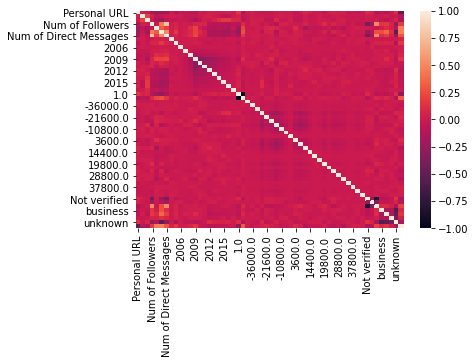

In [ ]:
corr =train_data.corr()
sns.heatmap(corr)

In [ ]:
cor_data = train_data
cor_data

,Personal URL,Profile Cover Image Status,Is Profile View Size Customized?,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1.0,2.0,-39600.0,-36000.0,-28800.0,-25200.0,-21600.0,-18000.0,-14400.0,-10800.0,-7200.0,0.0,3600.0,7200.0,10800.0,14400.0,16200.0,18000.0,19800.0,21600.0,25200.0,28800.0,32400.0,36000.0,37800.0,39600.0,46800.0,Not verified,Pending,Verified,business,celebrity,government,unknown,Num of Profile Likes
2,0.0,1.0,0,4.128561,3.273464,3.672005,2.357935,1.518514,0.301030,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.193125
4,1.0,1.0,0,3.964542,1.973128,3.514813,2.117271,0.954243,0.698970,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.033021
5,1.0,1.0,0,4.709160,2.372912,4.200905,2.671173,1.518514,0.301030,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2.230449
8,0.0,1.0,0,4.281283,2.149219,3.427811,2.320146,1.322219,0.845098,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.093071
9,0.0,1.0,1,5.899709,2.869818,4.287174,2.380211,1.544068,0.602060,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,2.722634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,0.0,1.0,1,3.386677,2.996512,3.800648,1.662758,1.462398,0.477121,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3.820661
7492,0.0,1.0,0,4.893079,2.484300,3.926805,2.459392,1.531479,0.477121,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3.388101
7494,1.0,1.0,0,5.948095,2.290035,3.417638,3.085291,1.361728,0.301030,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2.588832
7495,0.0,0.0,0,3.784403,1.886491,2.993877,1.755875,1.414973,0.954243,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.137987


In [ ]:
train = cor_data.to_numpy()
Y_likes = train[:, -1] # for last column
X_likes = train[:, :-1] # for all but last column

X_Kaggle = test_data.to_numpy()

X_likes_scaled = minmax_scale(X_likes)

In [ ]:
columnsNamesArr = cor_data.columns.values
labels = columnsNamesArr[:-1]

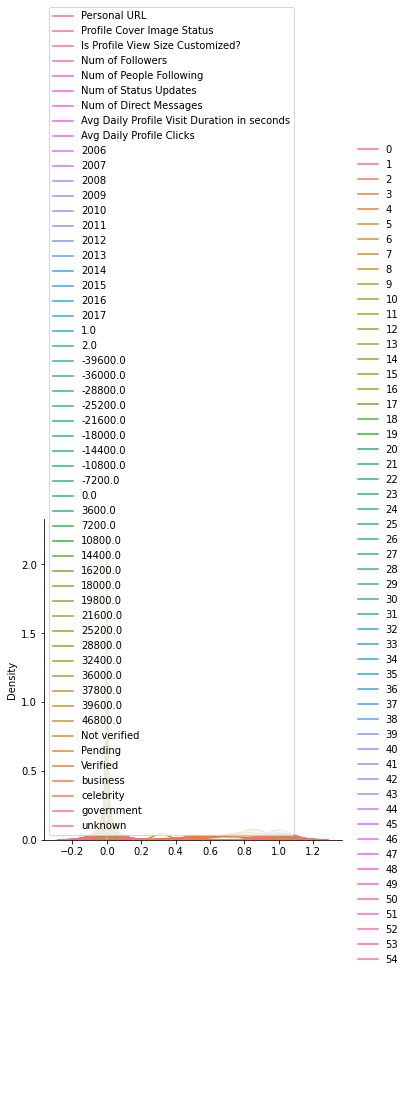

In [ ]:
sns.displot(data=X_likes_scaled, kind='kde', legend=True);
plt.legend(labels)


**Scaling and selecting features**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
X_selected_feat_likes = SelectKBest(f_regression, k=33).fit_transform(X_likes_scaled, Y_likes)
X_selected_feat_likes.shape

(4021, 33)

**This was to find the best number of selected features, no need to run it every time**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

best_i = 0
best_rmse = 10

for i in range(2, 54):

  X_selected_feat_likes = SelectKBest(f_regression, k=i).fit_transform(X_likes_scaled, Y_likes)
  X_selected_feat_likes.shape

  # split dataset to train and test
  X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_likes, Y_likes, 
                                                      test_size=0.2, 
                                                      shuffle=True, 
                                                      random_state=42 #  To guarantee that the split will always be the same
                                                      )  


  #regressor = LinearRegression()
  #regressor.fit(X_train, y_train)

  regressor = XGBRegressor()
  regressor.fit(X_train,y_train , verbose=False)

  y_pred = regressor.predict(X_test)

  ## RMSE Metric
  from sklearn.metrics import mean_squared_error
  import math
  rmse = math.sqrt(mean_squared_error(y_test, y_pred))
  if rmse<best_rmse:
    best_rmse = rmse
    best_i = i
  print(f"RMSE -> {rmse}")
print(best_rmse)
print(best_i)


**Sklearn Pipeline**

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X_selected_feat_likes, Y_likes, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42 #  To guarantee that the split will always be the same
                                                    )  


**Linear Regression Classifier**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7617407986671466

**Random Forest Classifier**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7750671597407869

**XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor
from sklearn import datasets, ensemble
"""
params = {'n_estimators': 2000,
          'max_depth': 10,
          'min_samples_split': 10,
          'learning_rate': 0.001}
XGBModel = ensemble.GradientBoostingRegressor(**params)
XGBModel.fit(X_train, y_train)
"""

regressor = XGBRegressor()
regressor.fit(X_train,y_train , verbose=False)

y_pred = regressor.predict(X_test)

[15:33:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RMSE -> 0.7476484833959012

**SVR Regressor**

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regressor = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7664196357813966

**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

RMSE -> 0.7472080882179262

**Testing with kera, not working for the moment**

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

NN_model = keras.Sequential()

# The Input Layer :
NN_model.add(layers.Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(layers.Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(layers.Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
def get_data():

    #get train data
    train = pd.read_pickle("train_cleaned.pkl")
    
    #get test data
    test = pd.read_pickle("test_cleaned.pkl")

    return train , test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train["Num of Profile Likes"]
  #train.drop(['Num of Profile Likes', 'Profile Image', 'Profile Text Color', 'Profile Page Color', 'Profile Theme Color'],axis = 1 , inplace = True)
  train.drop(['Id'], inplace=True, axis=1)
  return train, target

#Load train and test data into pandas DataFrames
train_data, test = get_data()

#Combine train and test data to process them together
train, target = get_combined_data()

In [ ]:
target

In [ ]:
train = np.asarray(train).astype(np.float32)

In [ ]:
NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

**Metric**

In [ ]:
## RMSE Metric
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE -> {rmse}")

RMSE -> 0.6774758036395543


In [ ]:
bias = regressor.intercept_
weights = regressor.coef_ 

print(f"Weights -> {weights}")
print(f"Bias -> {bias}")

Weights -> [-7.17240229e-01 -6.78559075e-02 -2.35943650e-01 -1.57667821e-01
  1.15916346e+00  2.27811685e+00 -3.19549973e-03  1.35326774e-01
  2.37917054e-01 -4.77299647e-01 -9.40806110e-01 -9.90205394e-01
 -9.85990028e-01 -1.01514729e+00 -1.03095765e+00 -9.39672317e-01
 -8.40580714e-01 -7.69390695e-01 -6.80281211e-01 -4.30416703e-01
  2.29476846e+13  2.29476846e+13  4.24296076e-01 -3.94890533e-01
 -1.55405952e-01  6.31449536e-02  1.05040499e-01 -4.68863891e-02
 -2.15748071e-01 -9.90926886e-02 -2.04182091e-01  2.36694053e-02
  3.70580914e-02 -1.52343750e-01 -1.26220703e-01  8.80126953e-02
 -1.89208984e-01 -8.20312500e-02 -5.62500000e-01 -4.80468750e-01
 -1.06933594e-01 -6.65649414e-01 -5.80078125e-01  2.70751953e-01
  3.28369141e-02  1.24389648e-01 -4.02461424e+13 -4.02461424e+13
 -4.02461424e+13 -3.79734752e+12 -3.79734752e+12 -3.79734752e+12
 -3.79734752e+12]
Bias -> 21095805396736.746


**Predict Kaggle Data**

In [ ]:
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
regressor.fit(X_likes, Y_likes)
y_pred = regressor.predict(X_Kaggle)
print(len(y_pred))

[15:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2500


In [ ]:
import csv
preds = 10 ** y_pred - 1
preds = np.around(preds)

with open('preds.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='|', 
                            quoting=csv.QUOTE_MINIMAL)
    
    spamwriter.writerow(['Id', 'Predicted'])

    for id, pred in zip(id_test, preds):
      spamwriter.writerow([id, pred])
